It is assumed that a majority of rentals only take place on a single day.  When looking at rentals in the future, it is worthwhile to look at which days the minutes of the rentals fall on, or is it sufficient to just look at which day the rental started?

In [1]:
# read in a CSV data of rentals with customer ID, booked datetime, and end datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# rentals = pd.read_csv('UntitledChart_2019-6-13_1228.csv')  # eiffel
rentals = pd.read_csv('UntitledChart_2019-6-14_1553.csv')  # darwin
# rentals = pd.read_csv('UntitledChart_2019-6-14_1603.csv')  # olympia


# create a new column with the timestamp correctly parsed as UTC and then converted to Madrid
# rentals['booked_at'] = pd.to_datetime(rentals['object_data-rental_booked_at']).dt.tz_localize('UTC').dt.tz_convert('Europe/Madrid')
# rentals['end_datetime'] = pd.to_datetime(rentals['object_data-rental_ended_at']).dt.tz_localize('UTC').dt.tz_convert('Europe/Madrid')
rentals['booked_at'] = pd.to_datetime(rentals['object_data-rental_booked_at']).dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')
rentals['end_datetime'] = pd.to_datetime(rentals['object_data-rental_ended_at']).dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')
rentals.drop(['object_data-rental_booked_at', 'object_data-rental_ended_at'], axis=1, inplace=True)  # remove the original column
rentals.rename(columns={'object_data-customer_id': 'customer_id'}, inplace=True)

rentals.head()

,customer_id,booked_at,end_datetime
0,64158,2019-04-07 11:21:55.344302-07:00,2019-04-07 13:17:30.764021-07:00
1,33699,2019-04-07 12:52:03.986789-07:00,2019-04-07 13:18:03.711688-07:00
2,30245,2019-03-20 12:24:49.234084-07:00,2019-03-21 12:15:39.886185-07:00
3,15805,2019-04-07 12:38:10.330633-07:00,2019-04-07 12:47:57.782033-07:00
4,24653,2019-04-07 13:23:13.271124-07:00,2019-04-07 13:44:37.190946-07:00


In [2]:
# casual stats about the rental data
(rentals['end_datetime'] - rentals['booked_at']).describe()

count                     64780
mean     0 days 02:36:20.656651
std      0 days 06:27:32.723300
min             0 days 00:00:00
25%      0 days 00:09:46.321572
50%      0 days 00:18:58.883895
75%      0 days 00:59:58.513992
max      6 days 17:46:22.559431
dtype: object

In [3]:
# rentals which do not start and end on the same day
rentals['multiday'] = rentals.booked_at.dt.date != rentals.end_datetime.dt.date

In [4]:
# multiday rentals
multiday_rentals = rentals[rentals['multiday'] == True]
multiday_rentals.head()

,customer_id,booked_at,end_datetime,multiday
2,30245,2019-03-20 12:24:49.234084-07:00,2019-03-21 12:15:39.886185-07:00,True
23,24923,2019-04-21 08:25:01.226723-07:00,2019-04-22 08:02:34.554205-07:00,True
25,68467,2019-05-04 17:47:46.365000-07:00,2019-05-05 17:49:26.913105-07:00,True
29,60305,2019-04-01 22:45:11.345331-07:00,2019-04-02 22:51:43.779388-07:00,True
32,52400,2019-04-30 19:50:45.080816-07:00,2019-05-01 20:12:51.245163-07:00,True


In [5]:
# fraction of all rentals which are multiday
len(multiday_rentals) / len(rentals)

0.08856128434702068

1.5% of rentals are multiday rentals, but do these 1.5% contribute significantly to the total rental minutes (and therefore potentially revenue)?

In [6]:
total_minutes = (rentals['end_datetime'] - rentals['booked_at']).sum()
total_minutes

Timedelta('7033 days 07:42:17.877144')

In [7]:
multiday_minutes = (multiday_rentals['end_datetime'] - multiday_rentals['booked_at']).sum()
multiday_minutes

Timedelta('4875 days 02:36:31.267710')

In [8]:
# fraction of total rental minutes that are from multiday rentals
multiday_minutes / total_minutes

0.6931446278838568

7% of the rental minutes are from multiday rentals.  Of these multiday rental minutes, what fraction of them are not on the first day (and therefore would make looking at just the first day inaccurate)?

In [9]:
#  multiday rental minutes that aren't from the first day
multiday_non_first_day_minutes = (multiday_rentals['end_datetime'] - multiday_rentals['booked_at'].dt.ceil('D')).sum()
multiday_non_first_day_minutes

Timedelta('2777 days 06:50:22.546188')

In [10]:
multiday_non_first_day_minutes / total_minutes

0.39487533233330757

4% of rental minutes would be miscategorized by looking only at the booking day as the rental day

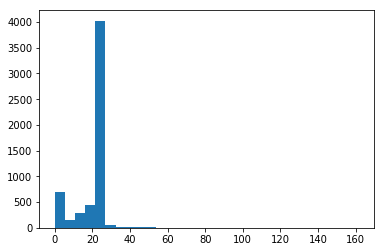

In [11]:
#  85 
a = (multiday_rentals['end_datetime'] - multiday_rentals['booked_at'])/ np.timedelta64(1, 'h')
n, bins, patches = plt.hist(a, bins=30)

In [12]:
# multiday_rentals['duration'] = (multiday_rentals['end_datetime'] - multiday_rentals['booked_at'])

In [13]:
# multiday_rentals.sort_values(by=['duration'], ascending=False)